In [1]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


from sklearn.preprocessing import LabelEncoder

In [2]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
combine = [train_df, test_df]

In [3]:
print(train_df.columns.values)

['PassengerId' 'HomePlanet' 'CryoSleep' 'Cabin' 'Destination' 'Age' 'VIP'
 'RoomService' 'FoodCourt' 'ShoppingMall' 'Spa' 'VRDeck' 'Name'
 'Transported']


In [4]:
train_df.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

In [5]:
train_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [6]:
train_df.tail()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False
8692,9280_02,Europa,False,E/608/S,TRAPPIST-1e,44.0,False,126.0,4688.0,0.0,0.0,12.0,Propsh Hontichre,True


In [7]:
train_df.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [8]:
train_df.isnull().sum().sum()

2324

In [9]:
test_df.isnull().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

In [10]:
test_df.isnull().sum().sum()

1117

In [11]:
train_df.info()
print('_'*40)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 colu

In [12]:
train_df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [13]:
train_df.describe(include=['O'])

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,VIP,Name
count,8693,8492,8476,8494,8511,8490,8493
unique,8693,3,2,6560,3,2,8473
top,0001_01,Earth,False,G/734/S,TRAPPIST-1e,False,Gollux Reedall
freq,1,4602,5439,8,5915,8291,2


In [14]:
pd.set_option('future.no_silent_downcasting', True)
def replace_mode(table, column):
    val = table[column].mode()[0]
    table[column] = table[column].fillna(val)
    
def replace_median(table, column):
    val = table[column].median()
    table[column] = table[column].fillna(val)

for dataset in combine:
    replace_median(dataset, 'Age')
    replace_median(dataset, 'RoomService')
    replace_median(dataset, 'FoodCourt')
    replace_median(dataset, 'ShoppingMall')
    replace_median(dataset, 'Spa')
    replace_median(dataset, 'VRDeck')
    
    replace_mode(dataset, 'HomePlanet')
    replace_mode(dataset, 'CryoSleep')
    replace_mode(dataset, 'Destination')
    replace_mode(dataset, 'VIP')



In [15]:
train_df.isnull().sum()

PassengerId       0
HomePlanet        0
CryoSleep         0
Cabin           199
Destination       0
Age               0
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Name            200
Transported       0
dtype: int64

In [16]:
test_df.isnull().sum()

PassengerId       0
HomePlanet        0
CryoSleep         0
Cabin           100
Destination       0
Age               0
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Name             94
dtype: int64

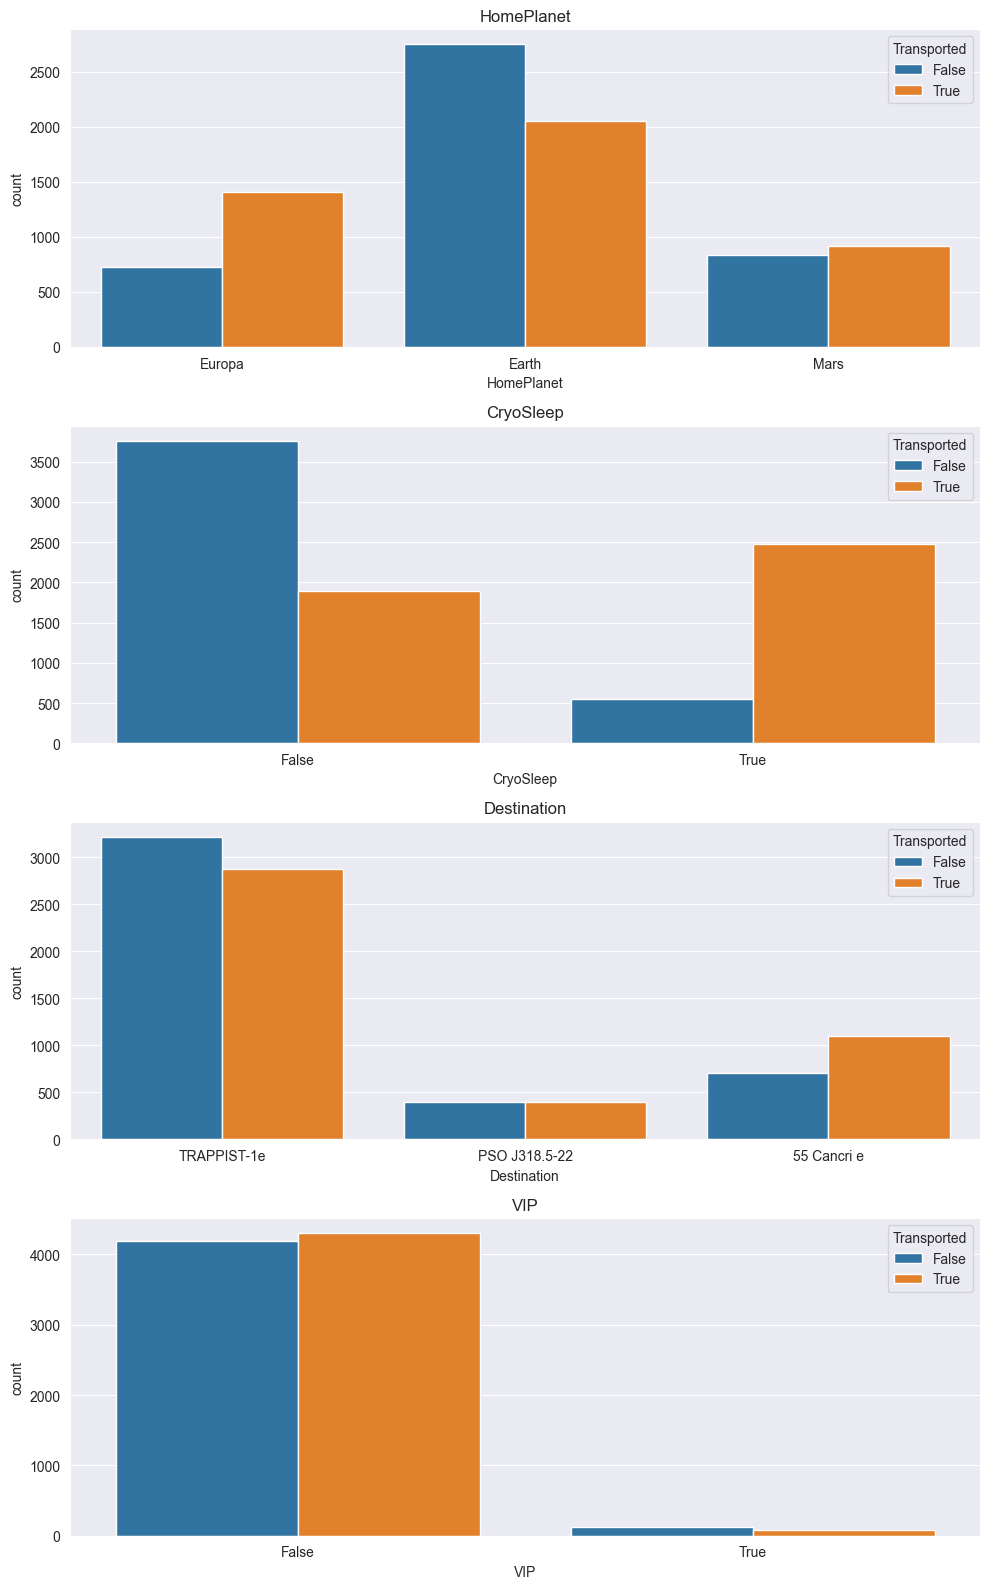

In [17]:
cat_feats=['HomePlanet', 'CryoSleep', 'Destination', 'VIP']

fig=plt.figure(figsize=(10,16))
for i, var_name in enumerate(cat_feats):
    ax=fig.add_subplot(4,1,i+1)
    sns.countplot(data=train_df, x=var_name, axes=ax, hue='Transported')
    ax.set_title(var_name)
fig.tight_layout()
plt.show()

In [18]:
train_df[['HomePlanet', 'Transported']].groupby(['HomePlanet'], as_index=False).mean().sort_values(by='Transported', ascending=False)

,HomePlanet,Transported
1,Europa,0.658846
2,Mars,0.523024
0,Earth,0.427649


In [19]:
train_df = pd.get_dummies(train_df, columns = ['HomePlanet'])
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   PassengerId        8693 non-null   object 
 1   CryoSleep          8693 non-null   object 
 2   Cabin              8494 non-null   object 
 3   Destination        8693 non-null   object 
 4   Age                8693 non-null   float64
 5   VIP                8693 non-null   object 
 6   RoomService        8693 non-null   float64
 7   FoodCourt          8693 non-null   float64
 8   ShoppingMall       8693 non-null   float64
 9   Spa                8693 non-null   float64
 10  VRDeck             8693 non-null   float64
 11  Name               8493 non-null   object 
 12  Transported        8693 non-null   bool   
 13  HomePlanet_Earth   8693 non-null   bool   
 14  HomePlanet_Europa  8693 non-null   bool   
 15  HomePlanet_Mars    8693 non-null   bool   
dtypes: bool(4), float64(6), 

In [20]:
test_df = pd.get_dummies(test_df,columns = ['HomePlanet'])
combine = [train_df,test_df]
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   PassengerId        4277 non-null   object 
 1   CryoSleep          4277 non-null   object 
 2   Cabin              4177 non-null   object 
 3   Destination        4277 non-null   object 
 4   Age                4277 non-null   float64
 5   VIP                4277 non-null   object 
 6   RoomService        4277 non-null   float64
 7   FoodCourt          4277 non-null   float64
 8   ShoppingMall       4277 non-null   float64
 9   Spa                4277 non-null   float64
 10  VRDeck             4277 non-null   float64
 11  Name               4183 non-null   object 
 12  HomePlanet_Earth   4277 non-null   bool   
 13  HomePlanet_Europa  4277 non-null   bool   
 14  HomePlanet_Mars    4277 non-null   bool   
dtypes: bool(3), float64(6), object(6)
memory usage: 413.6+ KB


In [21]:
train_df[["Destination", "Transported"]].groupby(['Destination'], as_index=False).mean().sort_values(by='Transported', ascending=False)

,Destination,Transported
0,55 Cancri e,0.610000
1,PSO J318.5-22,0.503769
2,TRAPPIST-1e,0.472199


In [22]:
train_df = pd.get_dummies(train_df,columns = ['Destination'])
test_df = pd.get_dummies(test_df,columns = ['Destination'])
combine = [train_df,test_df]
train_df.head()

,PassengerId,CryoSleep,Cabin,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
0,0001_01,False,B/0/P,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,False,True,False,False,False,True
1,0002_01,False,F/0/S,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,True,False,False,False,False,True
2,0003_01,False,A/0/S,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,False,True,False,False,False,True
3,0003_02,False,A/0/S,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,False,True,False,False,False,True
4,0004_01,False,F/1/S,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,True,False,False,False,False,True


In [23]:
test_df.head()

,PassengerId,CryoSleep,Cabin,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
0,0013_01,True,G/3/S,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,True,False,False,False,False,True
1,0018_01,False,F/4/S,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers,True,False,False,False,False,True
2,0019_01,True,C/0/S,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,False,True,False,True,False,False
3,0021_01,False,C/1/S,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter,False,True,False,False,False,True
4,0023_01,False,F/5/S,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez,True,False,False,False,False,True


In [24]:
train_df[["VIP", "Transported"]].groupby(['VIP'], as_index=False).mean().sort_values(by='Transported', ascending=False)

,VIP,Transported
0,False,0.506475
1,True,0.381910


In [25]:
for dataset in combine:
    le = LabelEncoder()
    dataset['VIP'] = le.fit_transform(dataset['VIP'])
train_df.head()

,PassengerId,CryoSleep,Cabin,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
0,0001_01,False,B/0/P,39.0,0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,False,True,False,False,False,True
1,0002_01,False,F/0/S,24.0,0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,True,False,False,False,False,True
2,0003_01,False,A/0/S,58.0,1,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,False,True,False,False,False,True
3,0003_02,False,A/0/S,33.0,0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,False,True,False,False,False,True
4,0004_01,False,F/1/S,16.0,0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,True,False,False,False,False,True


In [26]:
train_df[["CryoSleep", "Transported"]].groupby(['CryoSleep'], as_index=False).mean().sort_values(by='Transported', ascending=False)

,CryoSleep,Transported
1,True,0.817583
0,False,0.335042


In [27]:
train_df = pd.get_dummies(train_df,columns = ['CryoSleep'])
test_df = pd.get_dummies(test_df,columns = ['CryoSleep'])
combine = [train_df,test_df]
train_df.head()

,PassengerId,Cabin,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,CryoSleep_False,CryoSleep_True
0,0001_01,B/0/P,39.0,0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,False,True,False,False,False,True,True,False
1,0002_01,F/0/S,24.0,0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,True,False,False,False,False,True,True,False
2,0003_01,A/0/S,58.0,1,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,False,True,False,False,False,True,True,False
3,0003_02,A/0/S,33.0,0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,False,True,False,False,False,True,True,False
4,0004_01,F/1/S,16.0,0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,True,False,False,False,False,True,True,False


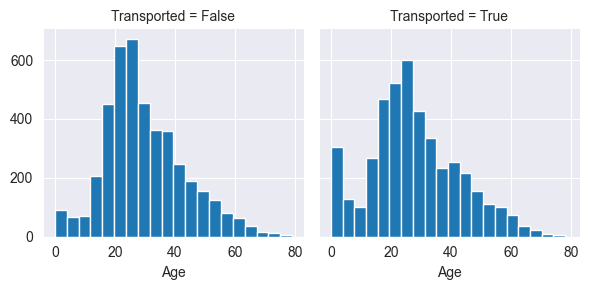

In [28]:
g = sns.FacetGrid(train_df, col='Transported')
g.map(plt.hist, 'Age', bins=20)

In [29]:
for dataset in combine:   
    dataset['AgeBin'] = pd.cut(dataset['Age'].astype(int), 5) #разбиваем возраста на равные отрезки
train_df.head()

,PassengerId,Cabin,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,CryoSleep_False,CryoSleep_True,AgeBin
0,0001_01,B/0/P,39.0,0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,False,True,False,False,False,True,True,False,"(31.6, 47.4]"
1,0002_01,F/0/S,24.0,0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,True,False,False,False,False,True,True,False,"(15.8, 31.6]"
2,0003_01,A/0/S,58.0,1,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,False,True,False,False,False,True,True,False,"(47.4, 63.2]"
3,0003_02,A/0/S,33.0,0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,False,True,False,False,False,True,True,False,"(31.6, 47.4]"
4,0004_01,F/1/S,16.0,0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,True,False,False,False,False,True,True,False,"(15.8, 31.6]"


In [30]:
test_df.head()

,PassengerId,Cabin,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,CryoSleep_False,CryoSleep_True,AgeBin
0,0013_01,G/3/S,27.0,0,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,True,False,False,False,False,True,False,True,"(15.8, 31.6]"
1,0018_01,F/4/S,19.0,0,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers,True,False,False,False,False,True,True,False,"(15.8, 31.6]"
2,0019_01,C/0/S,31.0,0,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,False,True,False,True,False,False,False,True,"(15.8, 31.6]"
3,0021_01,C/1/S,38.0,0,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter,False,True,False,False,False,True,True,False,"(31.6, 47.4]"
4,0023_01,F/5/S,20.0,0,10.0,0.0,635.0,0.0,0.0,Brence Harperez,True,False,False,False,False,True,True,False,"(15.8, 31.6]"


In [31]:
train_df[['AgeBin','Transported']].groupby(['AgeBin'],as_index=False).mean().sort_values(by='Transported',ascending=False)

C:\Users\rirer\AppData\Local\Temp\ipykernel_18508\1656352909.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train_df[['AgeBin','Transported']].groupby(['AgeBin'],as_index=False).mean().sort_values(by='Transported',ascending=False)


,AgeBin,Transported
0,"(-0.079, 15.8]",0.648387
3,"(47.4, 63.2]",0.486747
2,"(31.6, 47.4]",0.485510
1,"(15.8, 31.6]",0.475495
4,"(63.2, 79.0]",0.463235


In [32]:
for dataset in combine:
    dataset.loc[ dataset['Age'] <= 15, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 15) & (dataset['Age'] <= 31), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 31) & (dataset['Age'] <= 47), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 47) & (dataset['Age'] <= 63), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 63), 'Age'] = 4
    dataset['Age'] = dataset['Age'].astype(int)

In [33]:
train_df[['Age','Transported']].groupby(['Age'],as_index=False).mean().sort_values(by='Transported',ascending=False)

,Age,Transported
0,0,0.648387
3,3,0.486747
2,2,0.485510
1,1,0.475495
4,4,0.463235


Text(0.5, 1.0, 'Age')

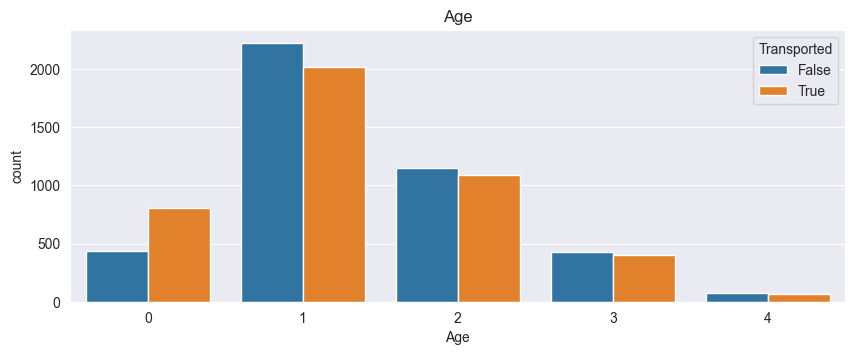

In [34]:
fig=plt.figure(figsize=(10,12))
plt.subplot(3,1,1)
sns.countplot(data=train_df, x='Age', hue='Transported', order=[0,1,2,3,4])
plt.title('Age')

In [35]:
def replace_empty_cabin(table, column):
    val = 'Z/9999/Z'
    table[column] = table[column].fillna(val)

for dataset in combine:
    replace_empty_cabin(dataset, 'Cabin')

In [36]:
for dataset in combine:
    dataset['deck'] = dataset['Cabin'].apply(lambda x:str(x)[:1])
    dataset['num'] = dataset['Cabin'].apply(lambda x:x.split('/')[1])
    dataset['num'] = dataset['num'].astype(int)
    dataset['side'] = dataset['Cabin'].apply(lambda x:str(x)[-1:])
    dataset['deck'].fillna(dataset['deck'].mode()[0],inplace=True)
    dataset['num'].fillna(dataset['num'].mode()[0],inplace=True)
    dataset['side'].fillna(dataset['side'].mode()[0],inplace=True)
    

C:\Users\rirer\AppData\Local\Temp\ipykernel_18508\894155440.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['deck'].fillna(dataset['deck'].mode()[0],inplace=True)
C:\Users\rirer\AppData\Local\Temp\ipykernel_18508\894155440.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a co

In [37]:
test_df.head()

,PassengerId,Cabin,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,...,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,CryoSleep_False,CryoSleep_True,AgeBin,deck,num,side
0,0013_01,G/3/S,1,0,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,...,False,False,False,True,False,True,"(15.8, 31.6]",G,3,S
1,0018_01,F/4/S,1,0,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers,...,False,False,False,True,True,False,"(15.8, 31.6]",F,4,S
2,0019_01,C/0/S,1,0,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,...,False,True,False,False,False,True,"(15.8, 31.6]",C,0,S
3,0021_01,C/1/S,2,0,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter,...,False,False,False,True,True,False,"(31.6, 47.4]",C,1,S
4,0023_01,F/5/S,1,0,10.0,0.0,635.0,0.0,0.0,Brence Harperez,...,False,False,False,True,True,False,"(15.8, 31.6]",F,5,S


In [38]:
train_df[['deck','Transported']].groupby(['deck'],as_index=False).mean().sort_values(by='Transported',ascending=False)

,deck,Transported
1,B,0.734275
2,C,0.680054
6,G,0.516217
8,Z,0.502513
0,A,0.496094
5,F,0.439871
3,D,0.433054
4,E,0.357306
7,T,0.200000


Text(0.5, 1.0, 'Cabin deck')

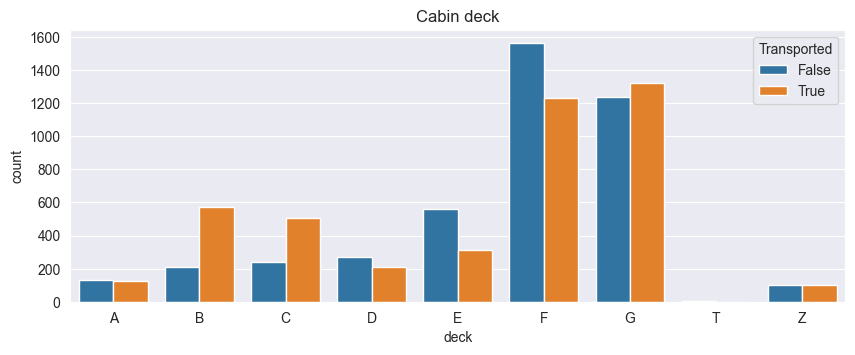

In [39]:
fig=plt.figure(figsize=(10,12))
plt.subplot(3,1,1)
sns.countplot(data=train_df, x='deck', hue='Transported', order=['A','B','C','D','E','F','G','T','Z'])
plt.title('Cabin deck') #можно разибть на статистические подругруппы по декам

In [40]:
deck_mapping = {"B": 1, "C": 1, "G": 2,"Z": 2, "A": 2, "F": 3, "D": 3, "E": 4, "T": 5}
for dataset in combine:
    dataset['deck'] = dataset['deck'].map(deck_mapping)

train_df.head()

,PassengerId,Cabin,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,...,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,CryoSleep_False,CryoSleep_True,AgeBin,deck,num,side
0,0001_01,B/0/P,2,0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,...,False,False,False,True,True,False,"(31.6, 47.4]",1,0,P
1,0002_01,F/0/S,1,0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,...,False,False,False,True,True,False,"(15.8, 31.6]",3,0,S
2,0003_01,A/0/S,3,1,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,...,False,False,False,True,True,False,"(47.4, 63.2]",2,0,S
3,0003_02,A/0/S,2,0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,...,False,False,False,True,True,False,"(31.6, 47.4]",2,0,S
4,0004_01,F/1/S,1,0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,...,False,False,False,True,True,False,"(15.8, 31.6]",3,1,S


In [41]:
test_df.head()

,PassengerId,Cabin,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,...,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,CryoSleep_False,CryoSleep_True,AgeBin,deck,num,side
0,0013_01,G/3/S,1,0,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,...,False,False,False,True,False,True,"(15.8, 31.6]",2,3,S
1,0018_01,F/4/S,1,0,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers,...,False,False,False,True,True,False,"(15.8, 31.6]",3,4,S
2,0019_01,C/0/S,1,0,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,...,False,True,False,False,False,True,"(15.8, 31.6]",1,0,S
3,0021_01,C/1/S,2,0,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter,...,False,False,False,True,True,False,"(31.6, 47.4]",1,1,S
4,0023_01,F/5/S,1,0,10.0,0.0,635.0,0.0,0.0,Brence Harperez,...,False,False,False,True,True,False,"(15.8, 31.6]",3,5,S


In [42]:
side_map = {'P':1,'S':0}
for dataset in combine:
    dataset['side'] = dataset['side'].map(side_map)

In [43]:
for dataset in combine:
    dataset['side'].fillna(dataset['side'].mode()[0],inplace=True)

C:\Users\rirer\AppData\Local\Temp\ipykernel_18508\135366022.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['side'].fillna(dataset['side'].mode()[0],inplace=True)


In [44]:
test_df

,PassengerId,Cabin,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,...,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,CryoSleep_False,CryoSleep_True,AgeBin,deck,num,side
0,0013_01,G/3/S,1,0,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,...,False,False,False,True,False,True,"(15.8, 31.6]",2,3,0.0
1,0018_01,F/4/S,1,0,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers,...,False,False,False,True,True,False,"(15.8, 31.6]",3,4,0.0
2,0019_01,C/0/S,1,0,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,...,False,True,False,False,False,True,"(15.8, 31.6]",1,0,0.0
3,0021_01,C/1/S,2,0,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter,...,False,False,False,True,True,False,"(31.6, 47.4]",1,1,0.0
4,0023_01,F/5/S,1,0,10.0,0.0,635.0,0.0,0.0,Brence Harperez,...,False,False,False,True,True,False,"(15.8, 31.6]",3,5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,G/1496/S,2,0,0.0,0.0,0.0,0.0,0.0,Jeron Peter,...,False,False,False,True,False,True,"(31.6, 47.4]",2,1496,0.0
4273,9269_01,Z/9999/Z,2,0,0.0,847.0,17.0,10.0,144.0,Matty Scheron,...,False,False,False,True,True,False,"(31.6, 47.4]",2,9999,0.0
4274,9271_01,D/296/P,1,0,0.0,0.0,0.0,0.0,0.0,Jayrin Pore,...,True,True,False,False,False,True,"(15.8, 31.6]",3,296,1.0
4275,9273_01,D/297/P,1,0,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale,...,False,False,False,True,True,False,"(15.8, 31.6]",3,297,1.0


In [45]:
train_df.isnull().sum()

PassengerId                    0
Cabin                          0
Age                            0
VIP                            0
RoomService                    0
FoodCourt                      0
ShoppingMall                   0
Spa                            0
VRDeck                         0
Name                         200
Transported                    0
HomePlanet_Earth               0
HomePlanet_Europa              0
HomePlanet_Mars                0
Destination_55 Cancri e        0
Destination_PSO J318.5-22      0
Destination_TRAPPIST-1e        0
CryoSleep_False                0
CryoSleep_True                 0
AgeBin                         0
deck                           0
num                            0
side                           0
dtype: int64

(0.0, 10000.0)

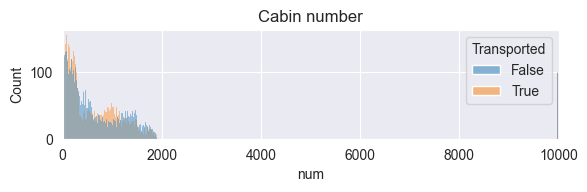

In [46]:
plt.subplot(3,1,2)
sns.histplot(data=train_df, x='num', hue='Transported',binwidth=20)
plt.title('Cabin number')
plt.xlim([0,10000])

In [47]:
for dataset in combine:
    dataset['region1']=(dataset['num']<302.5).astype(int)  
    dataset['region2']=((dataset['num']>=302.5)& (dataset['num']<600)).astype(int)  
    dataset['region3']=((dataset['num']>=600)& (dataset['num']<900)).astype(int)  
    dataset['region4']=((dataset['num']>=900)& (dataset['num']<1200)).astype(int)  
    dataset['region5']=((dataset['num']>=1200)& (dataset['num']<1500)).astype(int)  
    dataset['region6']=((dataset['num']>=1500)& (dataset['num']<1800)).astype(int)  
    dataset['region7']=(dataset['num']>1800).astype(int)  

In [48]:
for dataset in combine:
    dataset['group'] = dataset.PassengerId.apply(lambda x:x.split('_')[0])
    dataset['group'] = dataset['group'].astype(int)

In [49]:
train_df.head()

,PassengerId,Cabin,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,...,num,side,region1,region2,region3,region4,region5,region6,region7,group
0,0001_01,B/0/P,2,0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,...,0,1.0,1,0,0,0,0,0,0,1
1,0002_01,F/0/S,1,0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,...,0,0.0,1,0,0,0,0,0,0,2
2,0003_01,A/0/S,3,1,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,...,0,0.0,1,0,0,0,0,0,0,3
3,0003_02,A/0/S,2,0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,...,0,0.0,1,0,0,0,0,0,0,3
4,0004_01,F/1/S,1,0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,...,1,0.0,1,0,0,0,0,0,0,4


In [50]:
for dataset in combine:
    dataset['sum'] = dataset['VRDeck'] + dataset['Spa'] + dataset['ShoppingMall'] + dataset['RoomService'] + dataset['FoodCourt']

In [51]:
for dataset in combine:
    dataset['vr'] = dataset['VRDeck'] / dataset['sum']
    dataset['spa'] = dataset['Spa'] / dataset['sum']
    dataset['room'] = dataset['RoomService'] / dataset['sum']
    dataset['shop'] = dataset['ShoppingMall'] / dataset['sum']
    dataset['food'] = dataset['FoodCourt'] / dataset['sum']

#заполняем поля поделенные на ноль
for dataset in combine:
    dataset['vr'].fillna(0,inplace = True)
    dataset['spa'].fillna(0,inplace = True)
    dataset['room'].fillna(0,inplace = True)
    dataset['shop'].fillna(0,inplace = True)
    dataset['food'].fillna(0,inplace = True)

C:\Users\rirer\AppData\Local\Temp\ipykernel_18508\1703697635.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['vr'].fillna(0,inplace = True)
C:\Users\rirer\AppData\Local\Temp\ipykernel_18508\1703697635.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, wh

In [52]:
test_df.head()

,PassengerId,Cabin,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,...,region5,region6,region7,group,sum,vr,spa,room,shop,food
0,0013_01,G/3/S,1,0,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,...,0,0,0,13,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
1,0018_01,F/4/S,1,0,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers,...,0,0,0,18,2832.0,0.000000,0.996822,0.000000,0.000000,0.003178
2,0019_01,C/0/S,1,0,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,...,0,0,0,19,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
3,0021_01,C/1/S,2,0,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter,...,0,0,0,21,7418.0,0.078862,0.024400,0.000000,0.000000,0.896738
4,0023_01,F/5/S,1,0,10.0,0.0,635.0,0.0,0.0,Brence Harperez,...,0,0,0,23,645.0,0.000000,0.000000,0.015504,0.984496,0.000000


In [53]:
train_df.isnull().sum()

PassengerId                    0
Cabin                          0
Age                            0
VIP                            0
RoomService                    0
FoodCourt                      0
ShoppingMall                   0
Spa                            0
VRDeck                         0
Name                         200
Transported                    0
HomePlanet_Earth               0
HomePlanet_Europa              0
HomePlanet_Mars                0
Destination_55 Cancri e        0
Destination_PSO J318.5-22      0
Destination_TRAPPIST-1e        0
CryoSleep_False                0
CryoSleep_True                 0
AgeBin                         0
deck                           0
num                            0
side                           0
region1                        0
region2                        0
region3                        0
region4                        0
region5                        0
region6                        0
region7                        0
group     

In [54]:
train_df = train_df.drop(['Name', 'PassengerId','AgeBin','Cabin','num'], axis=1)
test_df = test_df.drop(['Name', 'PassengerId','AgeBin','Cabin','num'], axis=1)
combine = [train_df, test_df]
train_df.shape, test_df.shape

((8693, 32), (4277, 31))

In [55]:
X_train = train_df.drop("Transported", axis=1)
Y_train = train_df["Transported"]
X_test  = test_df.copy()
X_train.shape, Y_train.shape, X_test.shape

((8693, 31), (8693,), (4277, 31))

In [56]:
from catboost import Pool, CatBoostClassifier

model = CatBoostClassifier(iterations=300,
                           learning_rate=0.15,
                           depth=4,
                           cat_features = [0],
                           loss_function='MultiClass')
model.fit(X_train, Y_train)
preds_class = model.predict(X_test)

0:	learn: 0.6436206	total: 219ms	remaining: 1m 5s
1:	learn: 0.6078031	total: 240ms	remaining: 35.7s
2:	learn: 0.5747173	total: 425ms	remaining: 42.1s
3:	learn: 0.5531754	total: 461ms	remaining: 34.1s
4:	learn: 0.5332224	total: 490ms	remaining: 28.9s
5:	learn: 0.5174952	total: 519ms	remaining: 25.4s
6:	learn: 0.5061069	total: 544ms	remaining: 22.8s
7:	learn: 0.4979122	total: 560ms	remaining: 20.5s
8:	learn: 0.4903493	total: 582ms	remaining: 18.8s
9:	learn: 0.4837251	total: 594ms	remaining: 17.2s
10:	learn: 0.4773579	total: 614ms	remaining: 16.1s
11:	learn: 0.4717698	total: 636ms	remaining: 15.3s
12:	learn: 0.4658925	total: 656ms	remaining: 14.5s
13:	learn: 0.4621770	total: 688ms	remaining: 14.1s
14:	learn: 0.4581801	total: 722ms	remaining: 13.7s
15:	learn: 0.4548802	total: 743ms	remaining: 13.2s
16:	learn: 0.4520449	total: 756ms	remaining: 12.6s
17:	learn: 0.4481231	total: 776ms	remaining: 12.2s
18:	learn: 0.4452239	total: 790ms	remaining: 11.7s
19:	learn: 0.4435489	total: 806ms	remaini

In [57]:
preds_class = preds_class.T
preds_class[0,:]
test_df = pd.read_csv('sample_submission.csv')
submission = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Transported": preds_class[0,:]
    })
submission.to_csv('submission.csv', index=False)

In [58]:
pd.read_csv('submission.csv')

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,False
...,...,...
4272,9266_02,True
4273,9269_01,True
4274,9271_01,True
4275,9273_01,True
